# Libraries and constants

In [4]:
library(ggplot2)
library(glue)
library(tidyverse)
library(scales)
library(grid)
library(ggpubr)
library(comprehenr)
library(listarrays)


std_width  <- 12
std_height <- 7
options(repr.plot.width = std_width, repr.plot.height = std_height)

colors <- c(
    "#fd7f6f",
    "#7eb0d5",
    "#b2e061",
    "#bd7ebe",
    "#ffb55a",
    "#8bd3c7"
)

fontsize <- 22

---

# Exercise 1

The triangular distribution, in the interval (a,b), is given by the following:

$$
f(X) = \begin{cases}
    \frac{2(x-a)}{(b-a)(c-a)} & \,\,\,\, \text{if} \,\, a \le x < c   \\
    \frac{2(b-x)}{(b-a)(b-c)} & \,\,\,\, \text{if} \,\, c \le x \le b \\
    0 & \,\,\,\,\text{otherwise}
\end{cases}
$$

where $c\in (a,\,b)$.

A) Plot the function, given the interval (a, b).

B) Write an algorithm to generate random numbers from the triangular distribution.

C) Generate $10^4$ random numbers from the distribution, show them in a histogram and superimpose the analytical curve.

## A) 

Let us define the function and create a plot.

In [3]:
dtriang <- function(x, a = 0, b = 2, c = 1) {
    ifelse(
        a <= x & x < c,
        (2 * (x - a)) / ((b - a) * (c - a)),
        ifelse(
            c <= x & x <= b,
            2 * (b - x) / ((b - a) * (b - c)),
            0
        )
    )
}

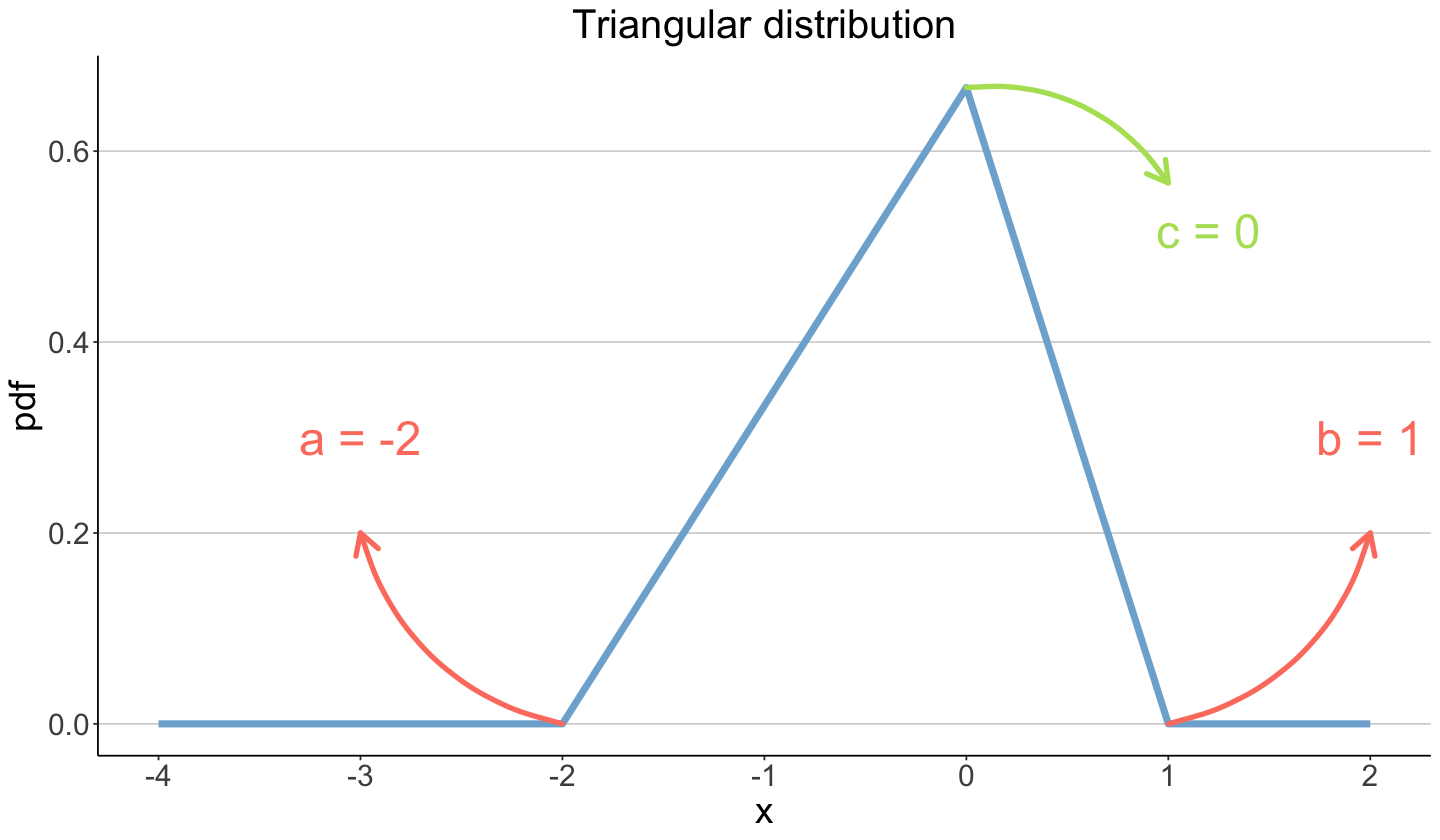

In [9]:
a <- -2
b <- +1
c <- 0

x <- seq(2*a, 2*b, 0.1)
y <- dtriang(x, a = a, b = b, c = c)

plt <- ggplot() +
geom_line(aes(x = x, y = y), color = colors[2], size = 2) +
theme_classic() +
theme(
    plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
    axis.title   = element_text(size = fontsize),
    axis.text    = element_text(size = fontsize - 4),
    legend.position    = "none",
    panel.grid.major.y = element_line(
        color    = alpha("black",0.2),
        size     = 0.5,
        linetype = 1
    )
) +

labs(
    title = glue("Triangular distribution"),
    x     = "x",
    y     = "pdf",
) +
scale_y_continuous(limits = c(0, NA)) +
scale_x_continuous(breaks = pretty_breaks()) +
geom_curve(
    aes(x = a, xend = a-1, y = 0, yend = 0.2),
    size = 1.5,
    color = colors[1],
    curvature = -0.3,
    lineend = "round",
    arrow = arrow(length = unit(0.5, "cm"))
) + 
geom_text(aes(x = a-1, y = 0.3, label = glue("a = {a}")), size = 10, color = colors[1]) + 
geom_curve(
    aes(x = b, xend = b+1, y = 0, yend = 0.2),
    size = 1.5,
    color = colors[1],
    curvature = 0.3,
    lineend = "round",
    arrow = arrow(length = unit(0.5, "cm"))
) + 
geom_text(aes(x = b+1, y = 0.3, label = glue("b = {b}")), size = 10, color = colors[1]) + 
geom_curve(
    aes(x = c, xend = c+1, y = dtriang(c, a = a, b = b, c = c), yend = dtriang(c, a = a, b = b, c = c)-0.1),
    size = 1.5,
    color = colors[3],
    curvature = -0.3,
    lineend = "round",
    arrow = arrow(length = unit(0.5, "cm"))
) + 
geom_text(aes(x = c+1.2, y = dtriang(c, a = a, b = b, c = c)-0.15, label = glue("c = {c}")), size = 10, color = colors[3])

plt

## B)

To build an algorithm that generates random numbers following the triangular distribution we rely on the inverse transform method. Thus, we need to compute the inverse cumulative function. 

In [10]:
# cumulative function
ptriang <- function(x, a = 0, b = 2, c = 1) {
    ifelse(
        x <= c & x >= a,
        (x - a)^2 / ((b - a) * (c - a)),
        ifelse(
            x <= b & x >= c,
            (2 * b * x - x^2) / ((b - a) * (b - c)) - (2 * b * c - c^2) / ((b - a) * (b - c)) + (c - a) / (b - a),                                  
            0
        )
    )
}

# quantile function
qtriang <- function(y, a = 0, b = 2, c = 1) {
    k <- (c - a) / (b - a)
    l <- (b - a) * (b - c)
    d <- -(2 * b * c - c^2) / l + k
    return(
        ifelse(
            y < k,
            sqrt((b - a) * (c - a) * y) + a,
            b - sqrt(b^2 + l * (d - y))
        )
    )
}

# sampling function
rtriang <- function(n, a = 0, b = 2, c = 1) {
    return(
        to_vec(
            for (p in runif(n)) qtriang(p, a, b, c)
        )
    )
}

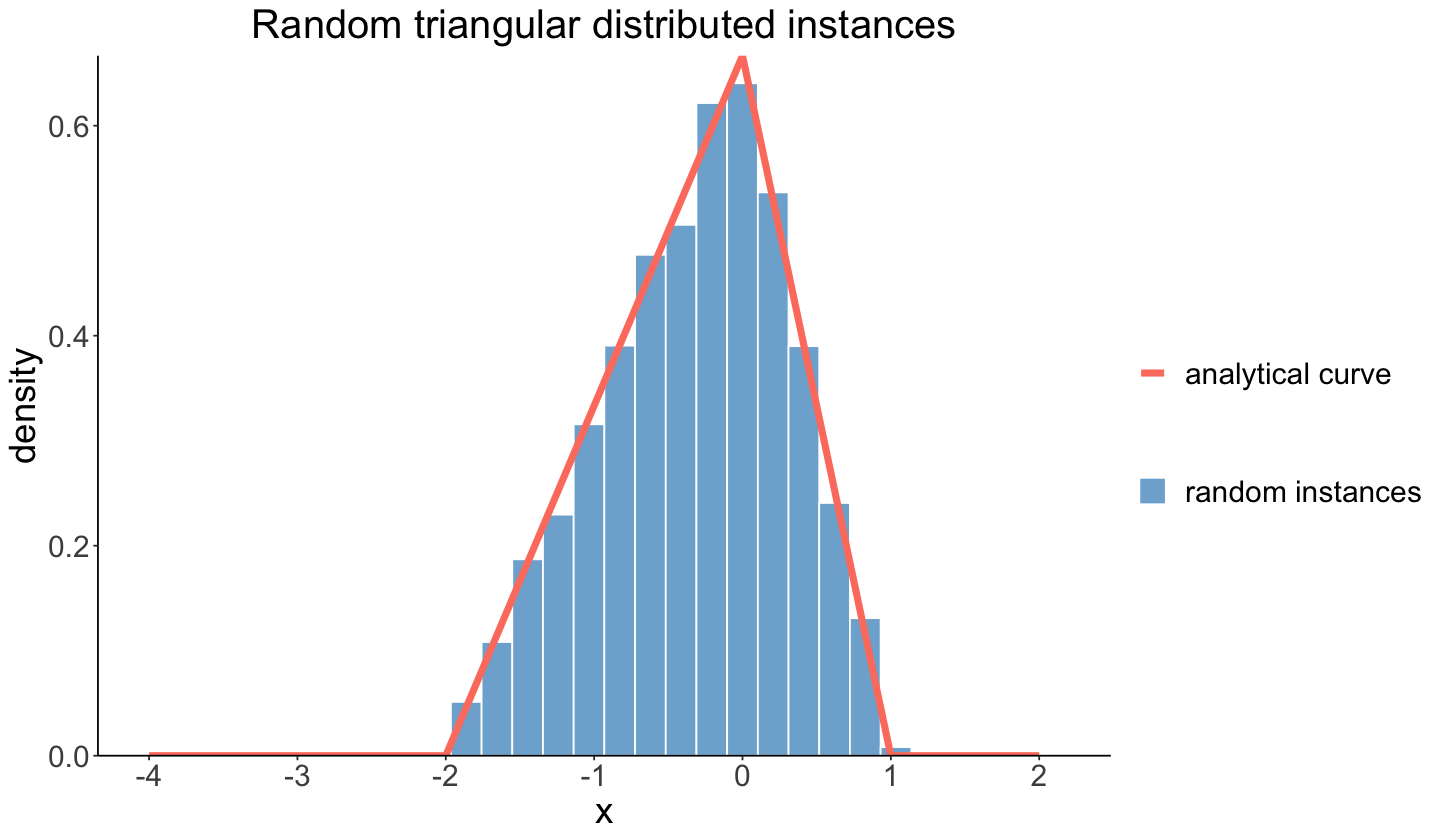

In [11]:
a <- -2
b <- +1
c <- 0

samples <- rtriang(10000, a = a, b = b, c = c)

x <- seq(2*a, 2*b, 0.1)
y <- dtriang(x, a = a, b = b, c = c)

plt <- ggplot() +
geom_histogram(
    aes(x = samples, y = ..density.., fill = "random instances"),
    bins     = 30,
    color    = "white"
) +
geom_line(
    aes(x = x, y = y, color = "analytical curve"),
    size  = 2
) +
theme_classic() +
theme(
    plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
    axis.title   = element_text(size = fontsize),
    axis.text    = element_text(size = fontsize - 4),
    legend.title = element_text(size = fontsize),
    legend.text  = element_text(size = fontsize - 4),
) +
labs(
    title = "Random triangular distributed instances",
    x     = "x",
    y     = "density",
    color = "",
    fill  = ""
) +
scale_y_continuous(limits = c(0, NA), expand = c(0, NA)) +
scale_x_continuous(breaks = pretty_breaks()) +
scale_color_manual(name = "", values = c(
        "analytical curve" = colors[1]
    )
) +
scale_fill_manual(name = "", values = c(
        "random instances" = colors[2]
    )
)

plt

---

# Exercise 2 - Markov's inequality

Markov’s inequality represents an upper bound to probability distributions:

$$
    P(X \ge k) \le \frac{E[X]}{k} \,\,\,\, \text{for}\,\, k>0
$$

Having defined a function 

$$
    G(k) = 1 - F(k) \equiv P(X\ge k)
$$

plot $G(k)$ and the Markov's upper bound for

A) the exponential Exp($\lambda=1$) distribution function

B) the uniform U(3, 5) distribution function

C) the binomial B(n=1, p=1/2) distribution function

D) the poisson Pois($\lambda=1/2$) distribution function

In [23]:
build_plot <- function(k, G, M, title, bound_label, prob_label, y_label, fontsize = 22) {

    df <- tibble::tibble(k, G, M)
    df <- reshape2::melt(df, id.vars = "k", measure.vars = c("G", "M"))

    plt <- ggplot2::ggplot(
        data = df, ggplot2::aes(k, value, color = variable)
    ) +
    geom_point(size = 3) +
    geom_line(size = 1.5) +
    theme_classic() +
    theme(
        plot.title   = element_text(size = fontsize + 2, hjust = 0.5),
        axis.title   = element_text(size = fontsize),
        axis.text    = element_text(size = fontsize - 4),
        legend.title = element_text(size = fontsize),
        legend.text  = element_text(size = fontsize - 4),
        panel.grid.major.y = element_line(
        color    = alpha("black", 0.2),
        size     = 0.5,
        linetype = 1
    )
    ) +
    labs(
        title = title,
        x     = "k",
        y     = y_label,
    ) +
    # scale_y_continuous(limits = c(0, NA), expand = c(0, NA)) +
    scale_x_continuous(breaks = pretty_breaks()) +
    scale_color_manual(
        name = "", 
        values = c(colors[1], colors[2]),
        labels = c(prob_label, bound_label)
    )

    return(plt)
}

## A)


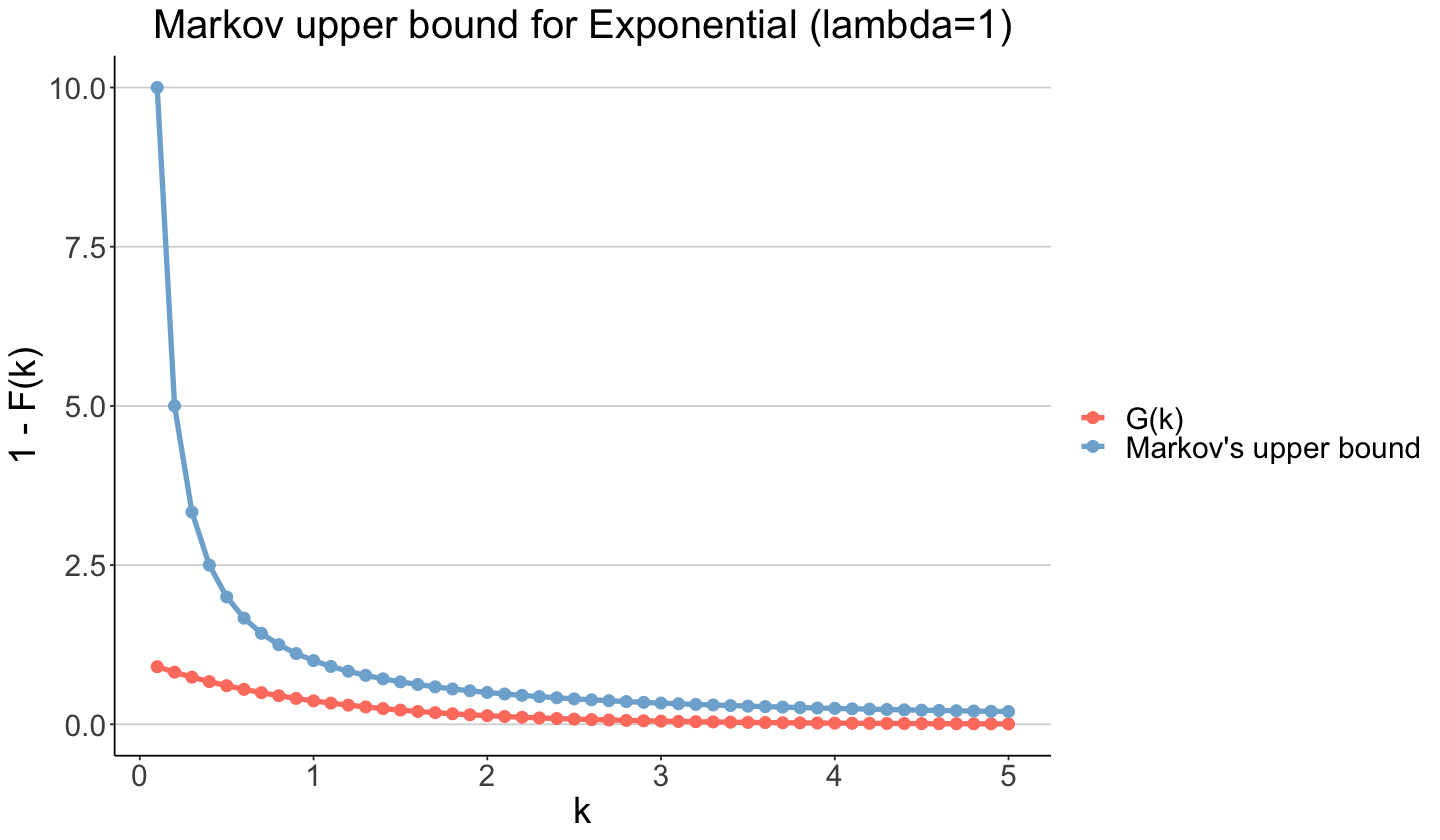

In [24]:
# exponential distribution
lambda <- 1
E      <- 1 / lambda

# sequence of k>0
k <- seq(0.1, 5, 0.1)

# cumulative distribution
F <- pexp(k, lambda)

# G(k) = 1 - F(k)
G <- 1 - F

# Markov's upper bound
Markov <- E / k


# PLOT
title  <- glue("Markov upper bound for Exponential (lambda={lambda})")
bound_label <- "Markov's upper bound"
prob_label  <- "G(k)"
y_label     <- "1 - F(k)"
plt <- build_plot(
    k           = k,
    G           = G,
    M           = Markov,
    title       = title,
    bound_label = bound_label,
    prob_label  = prob_label,
    y_label     = y_label,
    fontsize = 22
)

plt

## B)

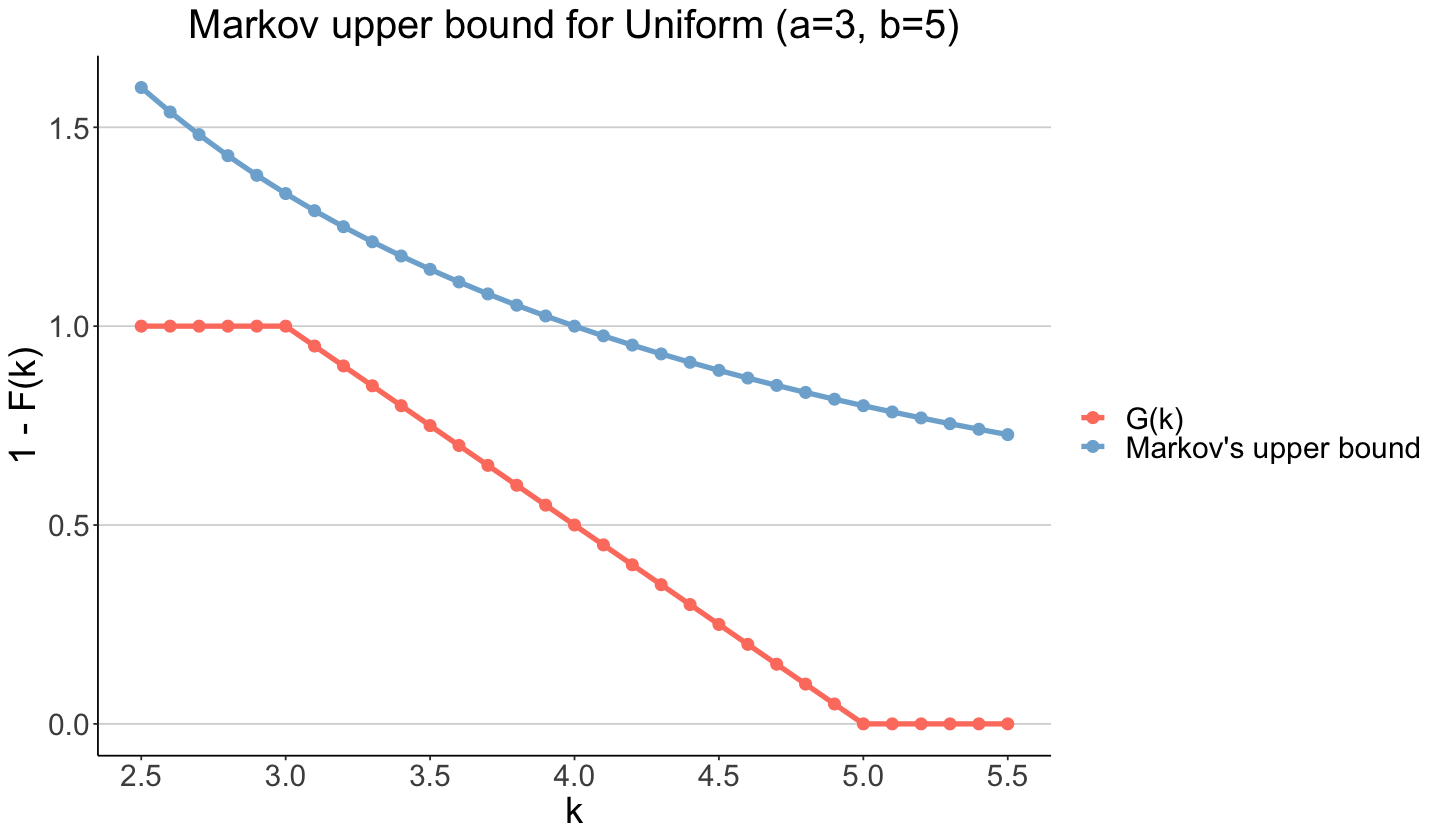

In [25]:
# uniform distribution
a <- 3
b <- 5
E <- (a + b) / 2

# sequence of k>0
k <- seq(2.5, 5.5, 0.1)

# cumulative distribution
F <- punif(k, a, b)

# G(k) = 1 - F(k)
G <- 1 - F

# Markov's upper bound
Markov <- E / k


# PLOT
title  <- glue("Markov upper bound for Uniform (a={a}, b={b})")
bound_label <- "Markov's upper bound"
prob_label  <- "G(k)"
y_label     <- "1 - F(k)"
plt <- build_plot(
    k           = k,
    G           = G,
    M           = Markov,
    title       = title,
    bound_label = bound_label,
    prob_label  = prob_label,
    y_label     = y_label,
    fontsize = 22
)
plt

## C)

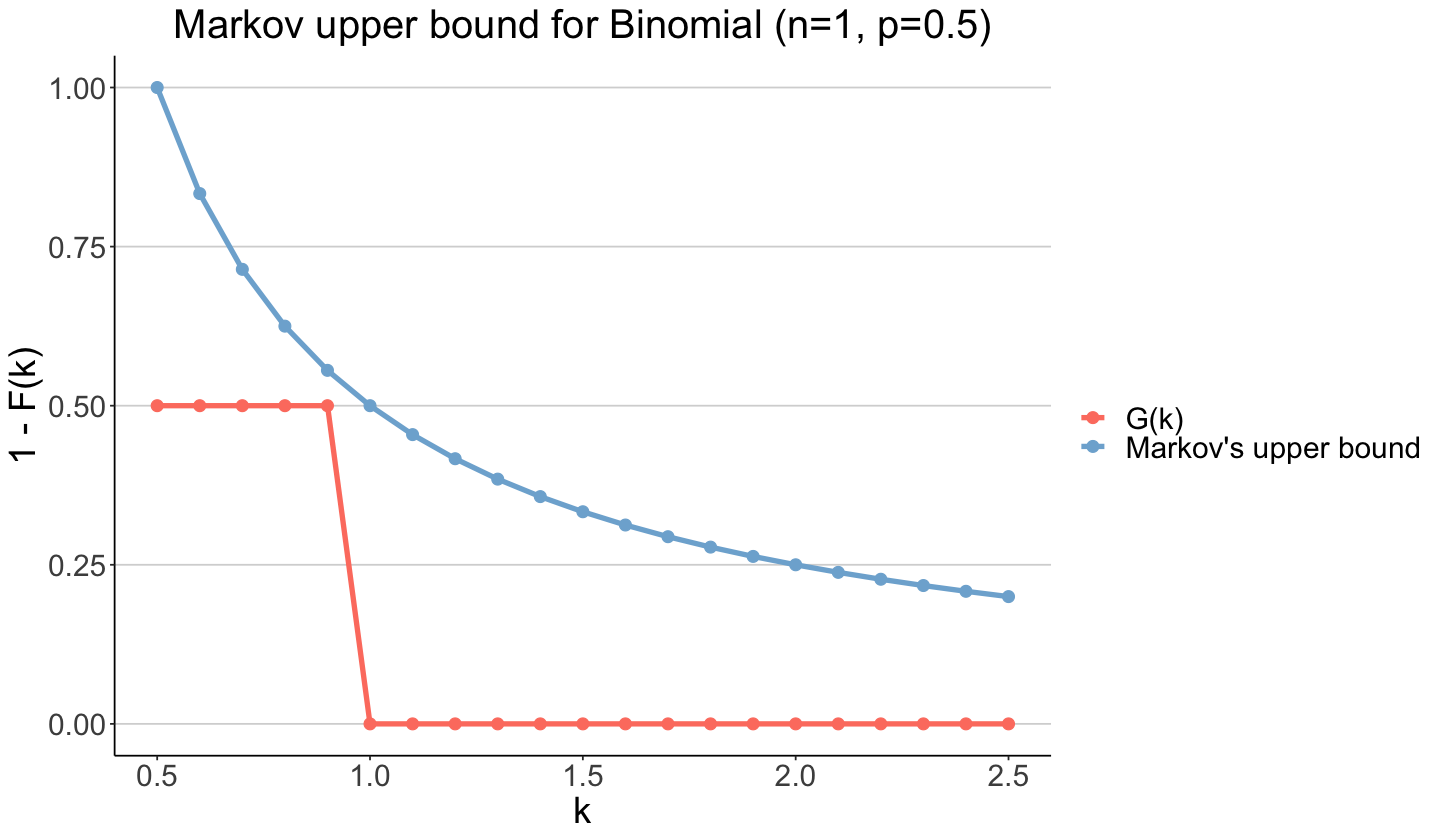

In [26]:
# binomial distribution
n <- 1
p <- 0.5
E <- n * p

# sequence of k>0
k <- seq(0.5, 2.5, 0.1)

# cumulative distribution
F <- pbinom(k, n, p)

# G(k) = 1 - F(k)
G <- 1 - F

# Markov's upper bound
Markov <- E / k


# PLOT
title  <- glue("Markov upper bound for Binomial (n={n}, p={p})")
bound_label <- "Markov's upper bound"
prob_label  <- "G(k)"
y_label     <- "1 - F(k)"
plt <- build_plot(
    k           = k,
    G           = G,
    M           = Markov,
    title       = title,
    bound_label = bound_label,
    prob_label  = prob_label,
    y_label     = y_label,
    fontsize = 22
)

plt

## D)

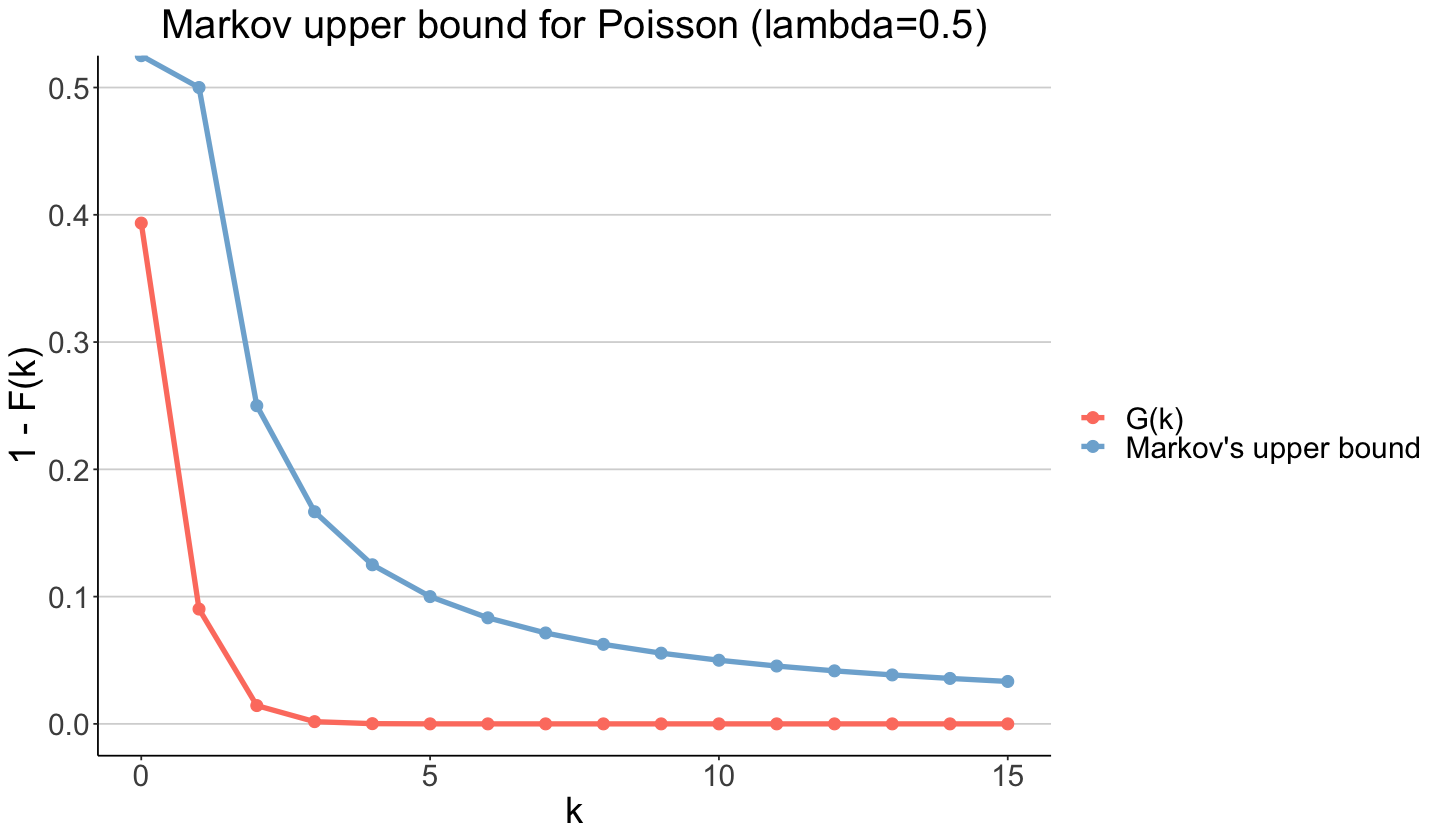

In [27]:
# poisson distribution
lambda <- 0.5
E      <- lambda

# sequence of k>0
k <- seq(0, 15, 1)

# cumulative distribution
F <- ppois(k, lambda)

# G(k) = 1 - F(k)
G <- 1 - F

# Markov's upper bound
Markov <- E / k


# PLOT
title  <- glue("Markov upper bound for Poisson (lambda={lambda})")
bound_label <- "Markov's upper bound"
prob_label  <- "G(k)"
y_label     <- "1 - F(k)"
plt <- build_plot(
    k           = k,
    G           = G,
    M           = Markov,
    title       = title,
    bound_label = bound_label,
    prob_label  = prob_label,
    y_label     = y_label,
    fontsize = 22
)

plt

---

# Exercise 3 - Chebyshev's inequality

Chebyshev's inequality tells us that

$$
P(|X-\mu|\ge k\sigma) \le \frac{1}{k^2}
$$

which can also be written as

$$
P(|X-\mu| < k\sigma) \ge 1- \frac{1}{k^2}
$$

Show with plots that Chebyshev's inequality is an upper bound to the following distributions:

A) a Normal distribution $N(\mu=3,\,\sigma=5)$

B) an Exponential distribution $E(\lambda=1)$

C) an Uniform distribution $U(a=1-\sqrt(2),\,b=1+\sqrt(2))$

D) a Poisson distribution $P(\mu=1/3)$

## A)

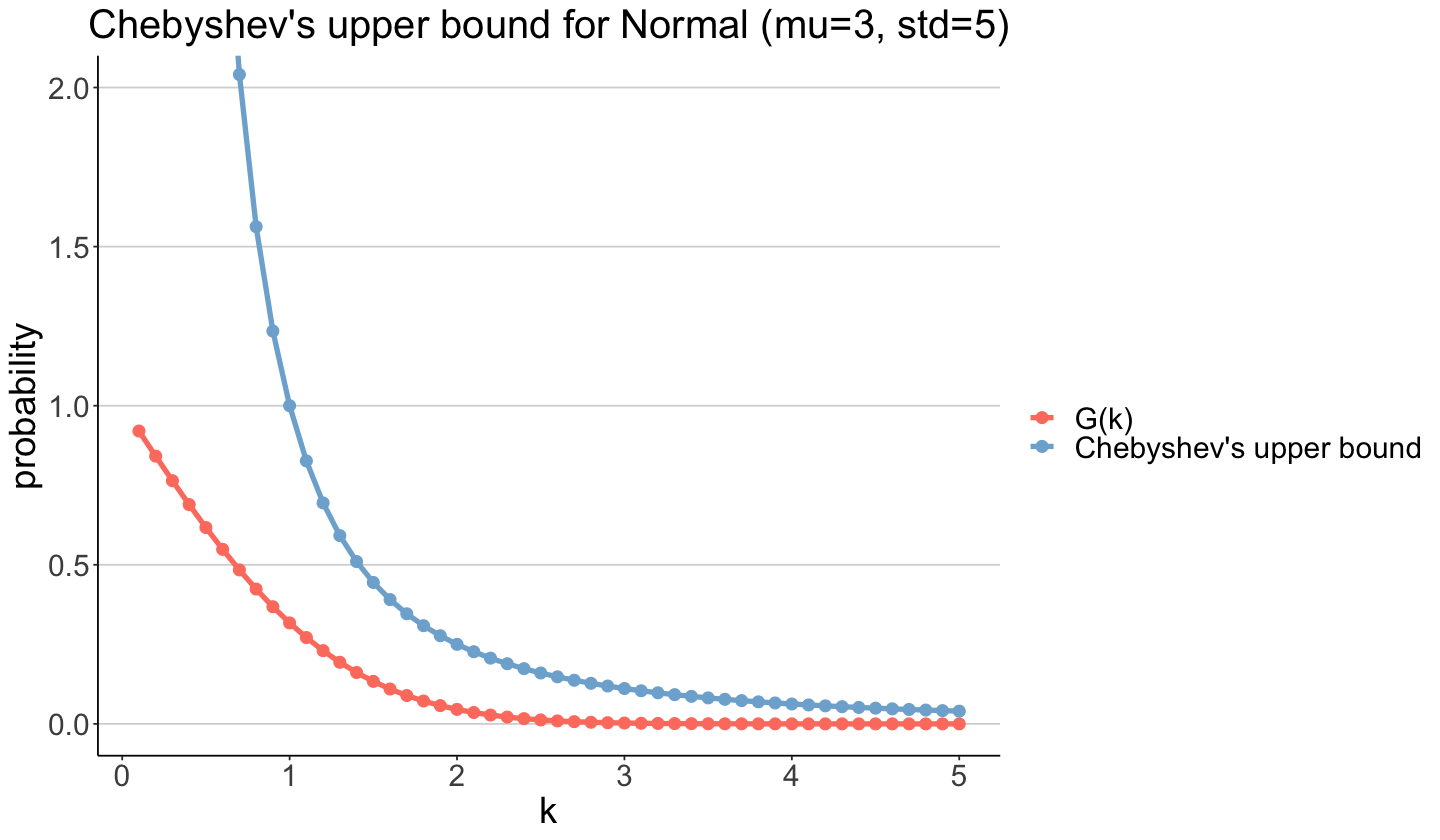

In [31]:
# normal distribution
mu     <- 3
std    <- 5


# sequence of k>0
k <- seq(0.1, 5, 0.1)


# G(k)
G <- pnorm(mu + k * std, mu, std, lower.tail = FALSE) + pnorm(mu - k * std, mu, std, lower.tail = TRUE)

# Markov's upper bound
Chebyshev <- 1 / k^2


# PLOT
title  <- glue("Chebyshev's upper bound for Normal (mu={mu}, std={std})")
bound_label <- "Chebyshev's upper bound"
prob_label  <- "G(k)"
y_label     <- "probability"
plt <- build_plot(
    k           = k,
    G           = G,
    M           = Chebyshev,
    title       = title,
    bound_label = bound_label,
    prob_label  = prob_label,
    y_label     = y_label,
    fontsize = 22
)
plt + coord_cartesian(ylim = c(0, 2))

## B)

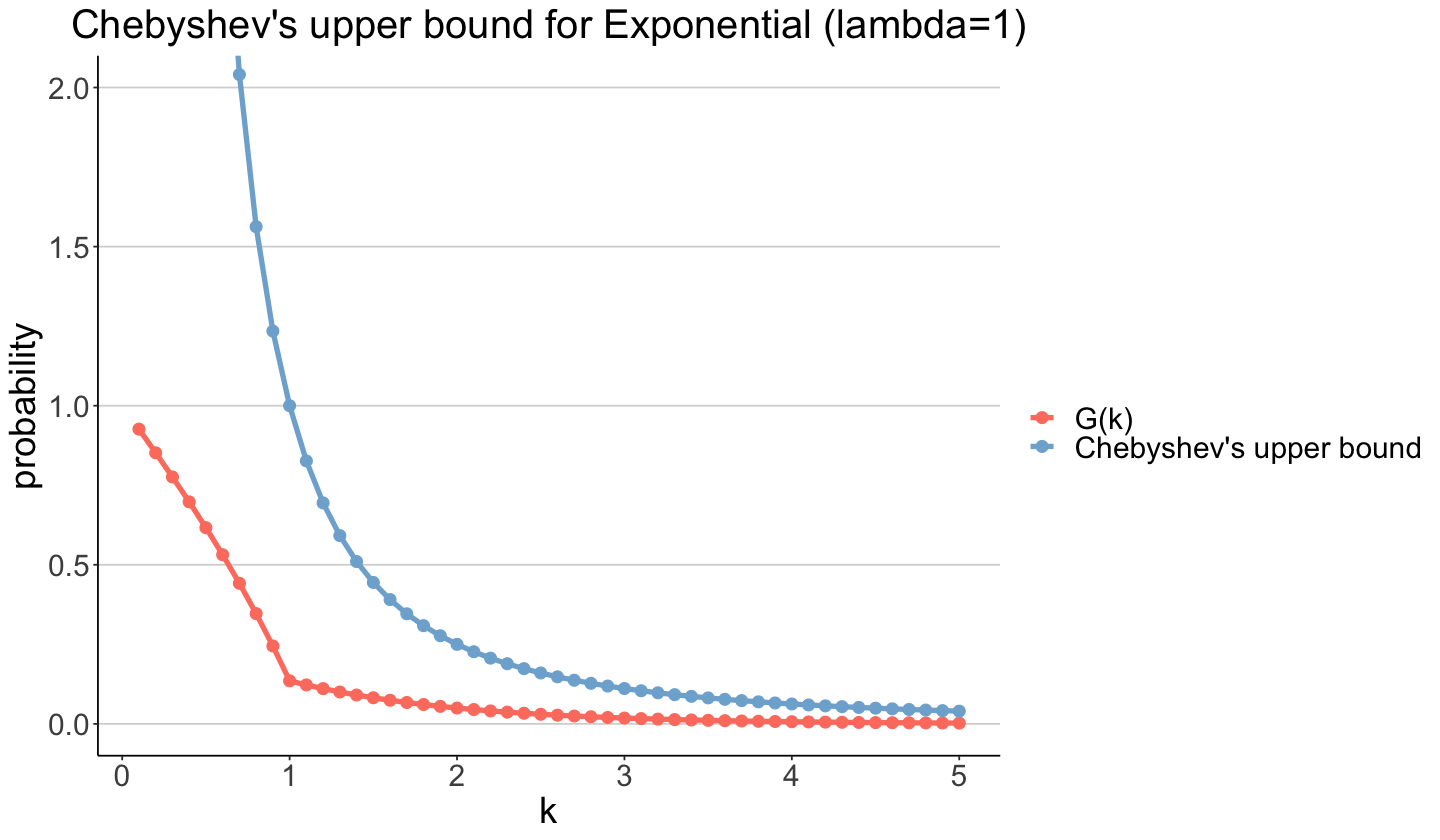

In [32]:
# exponential distribution
lambda <- 1
mu     <- 1 / lambda
std    <- 1 / lambda^2


# sequence of k>0
k <- seq(0.1, 5, 0.1)


# G(k)
G <- pexp(mu + k * std, lambda, lower.tail = FALSE) + pexp(mu - k * std, lambda, lower.tail = TRUE)

# Markov's upper bound
Chebyshev <- 1 / k^2


# PLOT
title  <- glue("Chebyshev's upper bound for Exponential (lambda={lambda})")
bound_label <- "Chebyshev's upper bound"
prob_label  <- "G(k)"
y_label     <- "probability"
plt <- build_plot(
    k           = k,
    G           = G,
    M           = Chebyshev,
    title       = title,
    bound_label = bound_label,
    prob_label  = prob_label,
    y_label     = y_label,
    fontsize = 22
)
plt + coord_cartesian(ylim = c(0, 2))

## C)

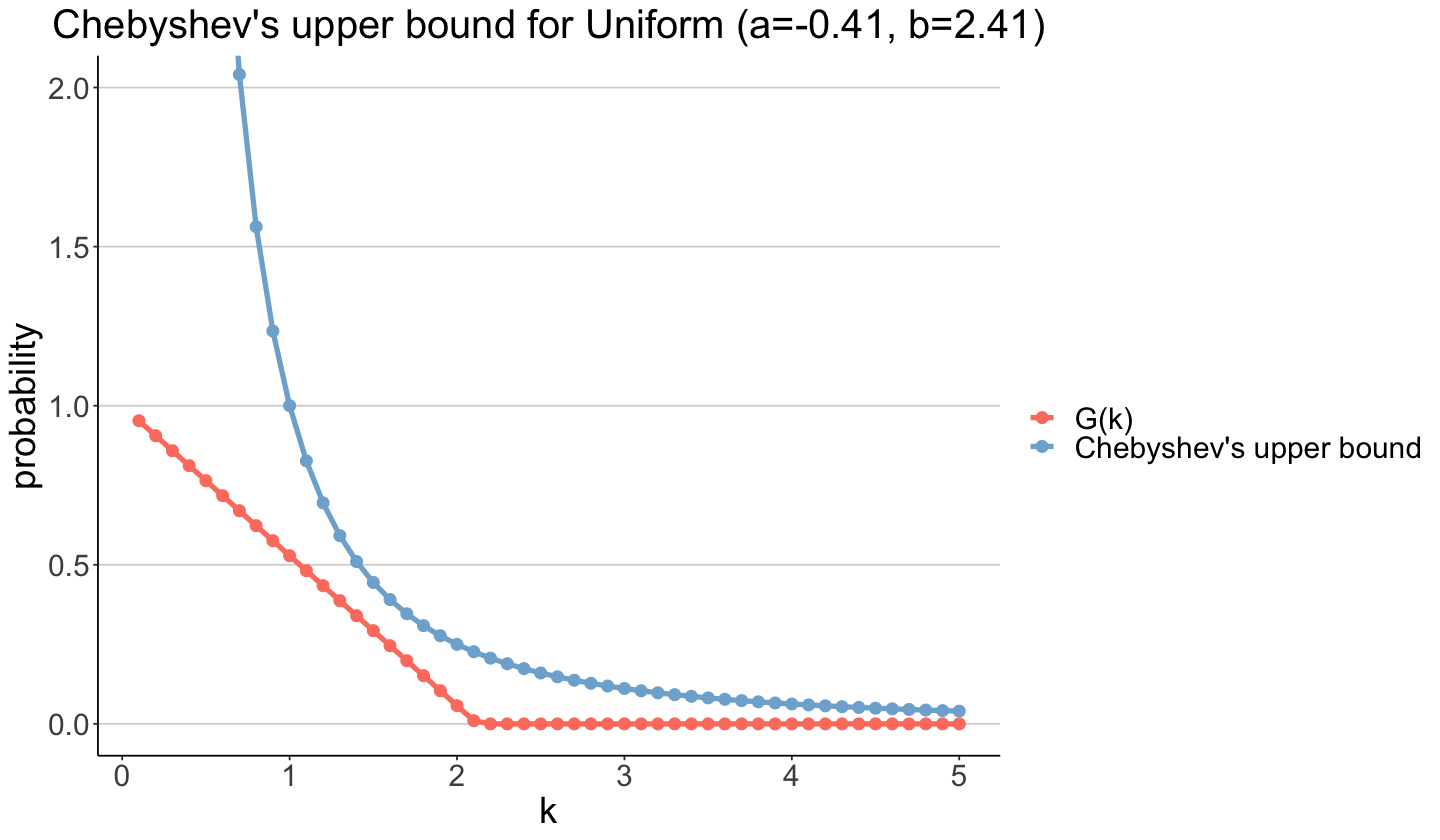

In [34]:
# uniform distribution
a   <- 1 - sqrt(2)
b   <- 1 + sqrt(2)
mu  <- (a + b) / 2
std <- (b - a)^2 / 12


# sequence of k>0
k <- seq(0.1, 5, 0.1)


# G(k)
G <- punif(mu + k * std, a, b, lower.tail = FALSE) + punif(mu - k * std, a, b, lower.tail = TRUE)

# Markov's upper bound
Chebyshev <- 1 / k^2


# PLOT
title  <- glue("Chebyshev's upper bound for Uniform (a={round(a,2)}, b={round(b,2)})")
bound_label <- "Chebyshev's upper bound"
prob_label  <- "G(k)"
y_label     <- "probability"
plt <- build_plot(
    k           = k,
    G           = G,
    M           = Chebyshev,
    title       = title,
    bound_label = bound_label,
    prob_label  = prob_label,
    y_label     = y_label,
    fontsize = 22
)
plt + coord_cartesian(ylim = c(0, 2))

## D)

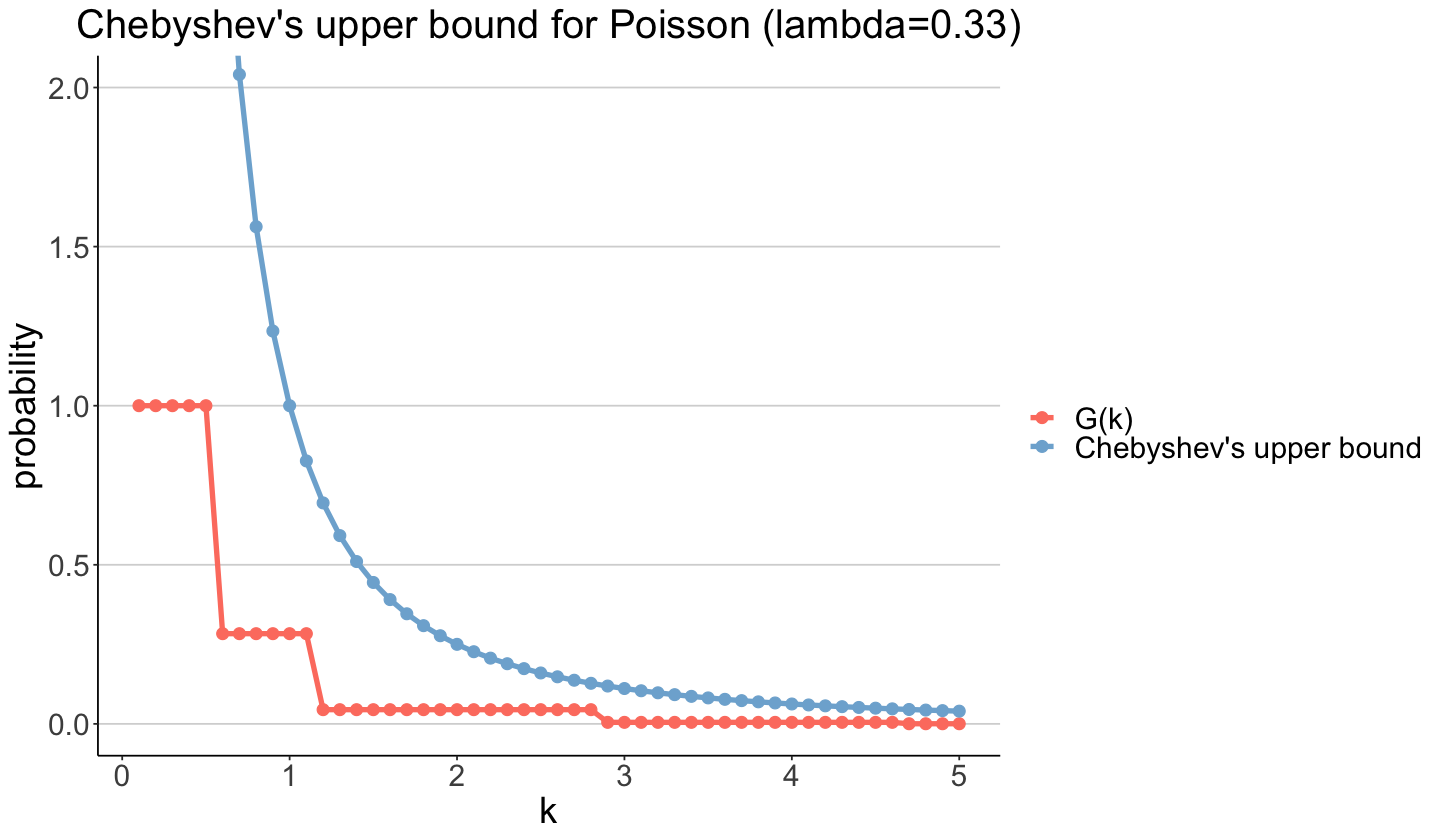

In [36]:
# exponential distribution
lambda <- 1 / 3
mu     <- lambda
std    <- sqrt(lambda)


# sequence of k>0
k <- seq(0.1, 5, 0.1)


# G(k)
G <- ppois(mu + k * std, lambda, lower.tail = FALSE) + ppois(mu - k * std, lambda, lower.tail = TRUE)

# Markov's upper bound
Chebyshev <- 1 / k^2


# PLOT
title  <- glue("Chebyshev's upper bound for Poisson (lambda={round(lambda,2)})")
bound_label <- "Chebyshev's upper bound"
prob_label  <- "G(k)"
y_label     <- "probability"
plt <- build_plot(
    k           = k,
    G           = G,
    M           = Chebyshev,
    title       = title,
    bound_label = bound_label,
    prob_label  = prob_label,
    y_label     = y_label,
    fontsize = 22
)
plt + coord_cartesian(ylim = c(0, 2))

# Exercise 4 - Six Boxes Toy Model : inference

To make this program interactive we have written it in the form of an R script.

To access the code, open the `LaiNicolo_rlab03_6_boxes_inference.R` file.

In an R environment, run the follwing command to run the code:

```R
    source("LaiNicolo_rlab03_6_boxes_inference.R")
```

# Exercise 5 - Six Boxes Toy Model : simulation

Here we will re-utilize portions of code that are in the R script, such as the following functions to create the plot and compute the likelihood of the six boxes.

In [127]:
# compute box likelihood
likelihood <- function(val, j) {
    if (val == 1) {
        return(j / 5)
    }
    if (val == 0) {
        return((5 - j) / 5)
    }
  else return(NA)
}

# create the plot given the 6 posteriors and the iteration index
create_plot <- function(posteriors, iter) {
    par(mfrow = c(2, 3), oma = c(0, 0, 2, 0), bg = "white")
    options(repr.plot.width = 14, repr.plot.height = 8)

    rownames(posteriors) <- c("B0", "B1", "B2", "B3", "B4", "B5")
    for (i in 1:dim(posteriors)[1]) {
        box <- rownames(posteriors)[i]
        plot(
            seq(0, iter, 1),
            posteriors[box, ],
            pch      = 20,
            cex      = 1,
            ylim     = c(0, 1),
            xlab     = "trial",
            ylab     = "probability",
            main     = box,
            cex.main = 1,
            cex.lab  = 1,
            xaxt     = "n"
        )
        axis(1, at = 0:999)
        grid()
    }
    mtext("Six Boxes Toy Model : simulation", outer = TRUE, cex = 1.5)
}

Selected box with 3 whites.


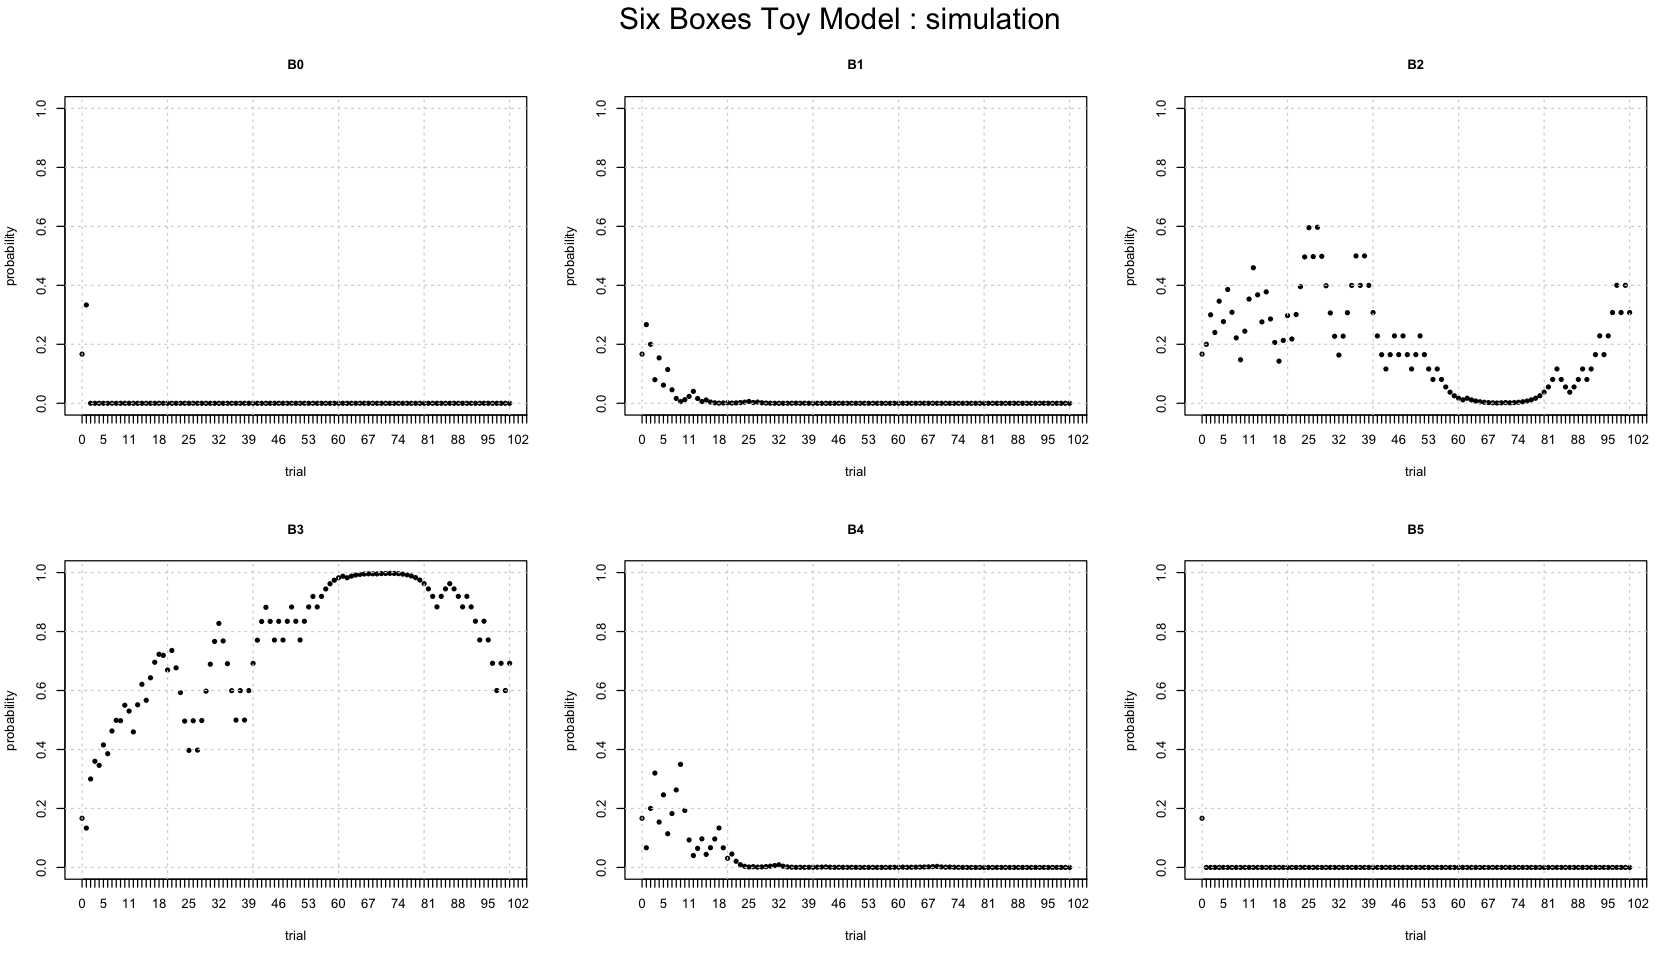

In [128]:
# true  -> writes the probability of each box at every extraction
# false -> just shows the plot
verbose <- FALSE


n_extractions <- 100
box           <- sample(0:5, 1)
cat(glue("Selected box with {box} whites.\n\n"))


# initial state
iter       <- 0
posterior  <- array(rep(1 / 6, 6)) # uniform when we have no information
posteriors <- expand_dims(posterior, which_dim = 2)

while (iter < n_extractions) {

    if (verbose) {
        # print the 6 probabilities
        if (iter == 0) {
            cat("Initial probabilities:\n")
        }
        else {
            cat(glue("Extraction number {iter}:\n\n"))
        }
        print(posterior)
    }

    # color extraction
    x <- rbinom(1, 1, likelihood(1, box))

    # update prior
    prior <- posterior

    # compute likelihoods
    likelihoods <- c(
        likelihood(x, 0),
        likelihood(x, 1),
        likelihood(x, 2),
        likelihood(x, 3),
        likelihood(x, 4),
        likelihood(x, 5)
    )

    # compute evidence
    evidence   <- sum(likelihoods * prior)

    # compute posterior
    posterior  <- likelihoods * prior / evidence

    # store posteriors together
    posteriors <- cbind(posteriors, posterior)

    # update iteration state
    iter <- iter + 1

}


# plot probability distributions
create_plot(posteriors, iter)